In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

In [174]:
import numpy as np
df= pd.read_csv("dataset.csv")
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [175]:
df.count()

ID                 9709
Gender             9709
Own_car            9709
Own_property       9709
Work_phone         9709
Phone              9709
Email              9709
Unemployed         9709
Num_children       9709
Num_family         9709
Account_length     9709
Total_income       9709
Age                9709
Years_employed     9709
Income_type        9709
Education_type     9709
Family_status      9709
Housing_type       9709
Occupation_type    9709
Target             9709
dtype: int64

In [176]:
df.drop_duplicates(inplace=True)
# #check row count after dropping duplicates
df.count()

ID                 9709
Gender             9709
Own_car            9709
Own_property       9709
Work_phone         9709
Phone              9709
Email              9709
Unemployed         9709
Num_children       9709
Num_family         9709
Account_length     9709
Total_income       9709
Age                9709
Years_employed     9709
Income_type        9709
Education_type     9709
Family_status      9709
Housing_type       9709
Occupation_type    9709
Target             9709
dtype: int64

In [177]:
#check if any of the cells is blank or na
if df.isna().any().any():
    print("Datafrme containst blank cells (NA)")
else:
    print("Dataframe does not contain blank cells (NA)")

if df.isnull().any().any():
    print("Datafrme containst blank cells (Null)")
else:
    print("Dataframe does not contain blank cells (Null)")

Dataframe does not contain blank cells (NA)
Dataframe does not contain blank cells (Null)


Corrleation Matrix
                 Target    Gender    Own_car  Own_property  Unemployed  \
Target          1.000000  0.015033 -0.006787   -0.028227    -0.024926    
Gender          0.015033  1.000000  0.355420   -0.056067    -0.168753    
Own_car        -0.006787  0.355420  1.000000   -0.010190    -0.145493    
Own_property   -0.028227 -0.056067 -0.010190    1.000000     0.086675    
Unemployed     -0.024926 -0.168753 -0.145493    0.086675     1.000000    
Num_children    0.011715  0.054211  0.089565   -0.000480    -0.224611    
Num_family      0.007077  0.078460  0.138548    0.008782    -0.212479    
Account_length  0.077492 -0.008431  0.025058   -0.009627     0.005605    
Total_income    0.018784  0.200750  0.221874    0.025562    -0.166422    
Age            -0.043654 -0.173157 -0.127670    0.134602     0.617513    
Years_employed -0.009346 -0.028231  0.019096   -0.021443    -0.410936    

                Num_children  Num_family  Account_length  Total_income  \
Target            

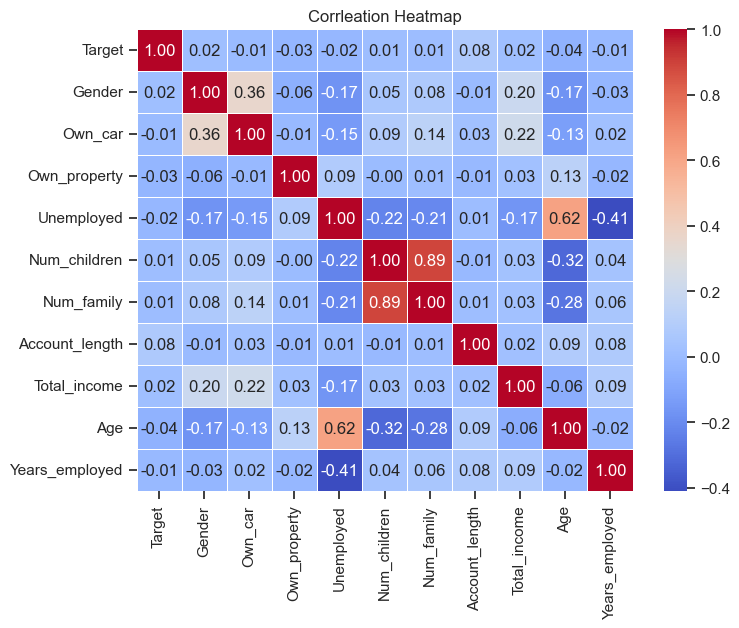


 Correlation Coefficients
Target vs Gender 0.02
Target vs Own_car -0.01
Target vs Own_property -0.03
Target vs Unemployed -0.02
Target vs Num_children 0.01
Target vs Num_family 0.01
Target vs Account_length 0.08
Target vs Total_income 0.02
Target vs Age -0.04
Target vs Years_employed -0.01


In [105]:
#import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
from scipy.stats import norm

#Calulate Correlation Matrix
subset_df = df[['Target','Gender', 'Own_car', 'Own_property', 'Unemployed', 'Num_children','Num_family','Account_length','Total_income','Age','Years_employed']]
correlation_matrix = subset_df.corr()
#print correlation matrix
print("Corrleation Matrix")
print (correlation_matrix)

#plot correlation heatmap
plt.figure(figsize=(8,6))
heatmap=sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f", linewidths=.5)

#heatmap.set_aspect('equal', adjustable ='box')

plt.title("Corrleation Heatmap")
plt.show()

# #Print Corrleation coefficients
print("\n Correlation Coefficients")
print("Target vs Gender", "{:.2f}".format(correlation_matrix.loc['Target', 'Gender']))
print("Target vs Own_car","{:.2f}".format (correlation_matrix.loc['Target', 'Own_car']))
print("Target vs Own_property", "{:.2f}".format(correlation_matrix.loc['Target', 'Own_property']))
print("Target vs Unemployed", "{:.2f}".format(correlation_matrix.loc['Target', 'Unemployed']))
print("Target vs Num_children", "{:.2f}".format(correlation_matrix.loc['Target', 'Num_children']))
print("Target vs Num_family", "{:.2f}".format(correlation_matrix.loc['Target', 'Num_family']))
print("Target vs Account_length", "{:.2f}".format(correlation_matrix.loc['Target', 'Account_length']))
print("Target vs Total_income", "{:.2f}".format(correlation_matrix.loc['Target', 'Total_income']))
print("Target vs Age", "{:.2f}".format(correlation_matrix.loc['Target', 'Age']))
print("Target vs Years_employed", "{:.2f}".format(correlation_matrix.loc['Target', 'Years_employed']))

1.0 to 0.8: Very strong positive correlation

0.8 to 0.6: Strong positive correlation

0.6 to 0.4: Moderate positive correlation

0.4 to 0.2: Weak positive correlation

0.2 to 0.0: Very weak positive correlation

0.0: No correlation

0.0 to -0.2: Very weak negative correlation

-0.2 to -0.4: Weak negative correlation

-0.4 to -0.6: Moderate negative correlation

-0.6 to -0.8: Strong negative correlation

-0.8 to -1.0: Very strong negative correlation

Shape of your Data Set loaded: (9709, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Account_length,int64,0.000000,0,0.000000,60.000000,No issue
Years_employed,float64,0.000000,NA,0.000000,43.020733,Column has 469 outliers greater than upper bound (19.11) or lower than lower bound(-9.98). Cap them or remove them.
Gender,int64,0.000000,0,0.000000,1.000000,No issue
Unemployed,int64,0.000000,0,0.000000,1.000000,No issue
Num_children,int64,0.000000,0,0.000000,19.000000,Column has 152 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Num_family,int64,0.000000,0,1.000000,20.000000,"Column has 142 outliers greater than upper bound (4.50) or lower than lower bound(0.50). Cap them or remove them., Column has a high correlation with ['Num_children']. Consider dropping one of them."
Age,float64,0.000000,NA,20.504186,68.863837,No issue
Total_income,float64,0.000000,NA,27000.000000,1575000.000000,Column has 318 outliers greater than upper bound (393750.00) or lower than lower bound(-56250.00). Cap them or remove them.
Target,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 6


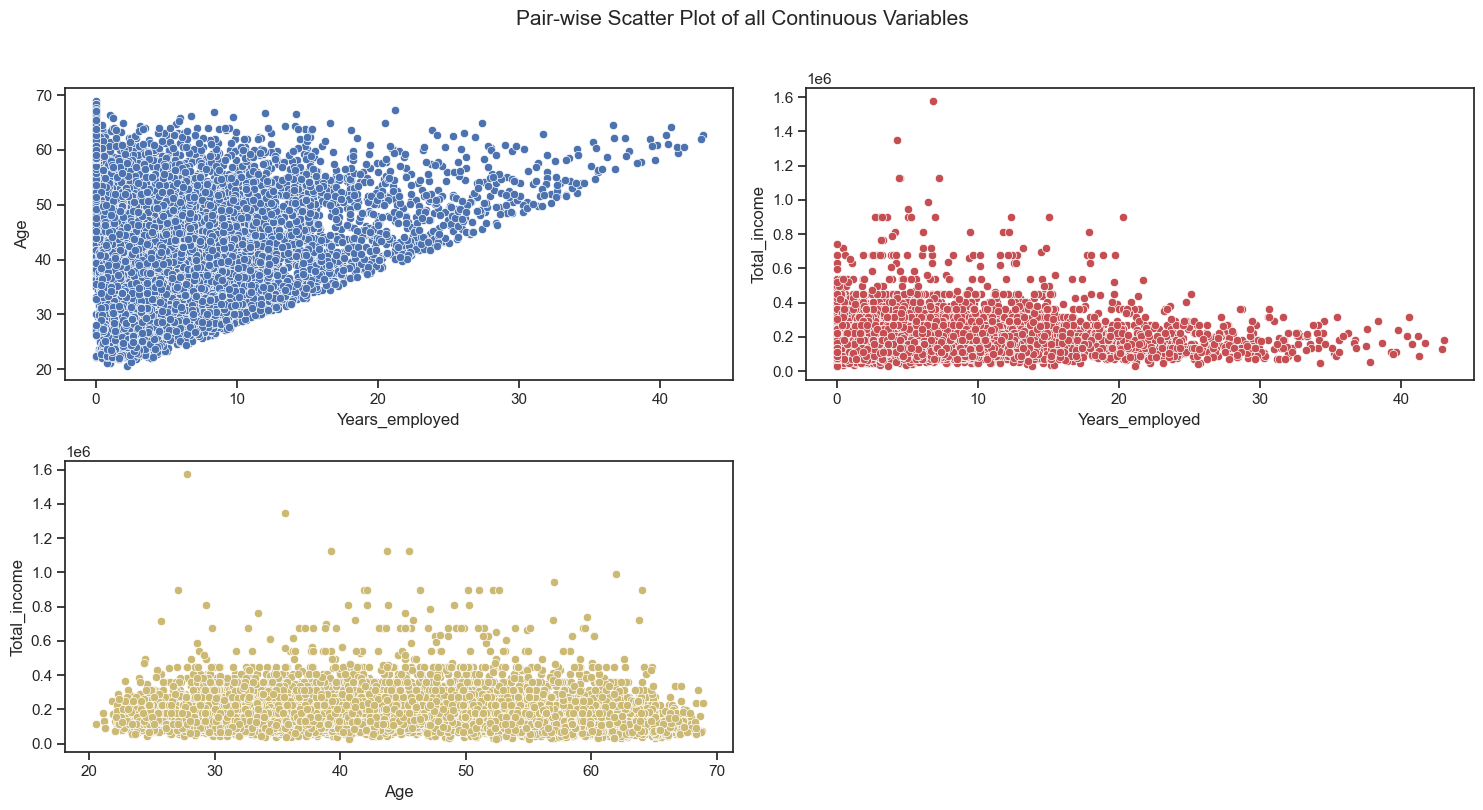

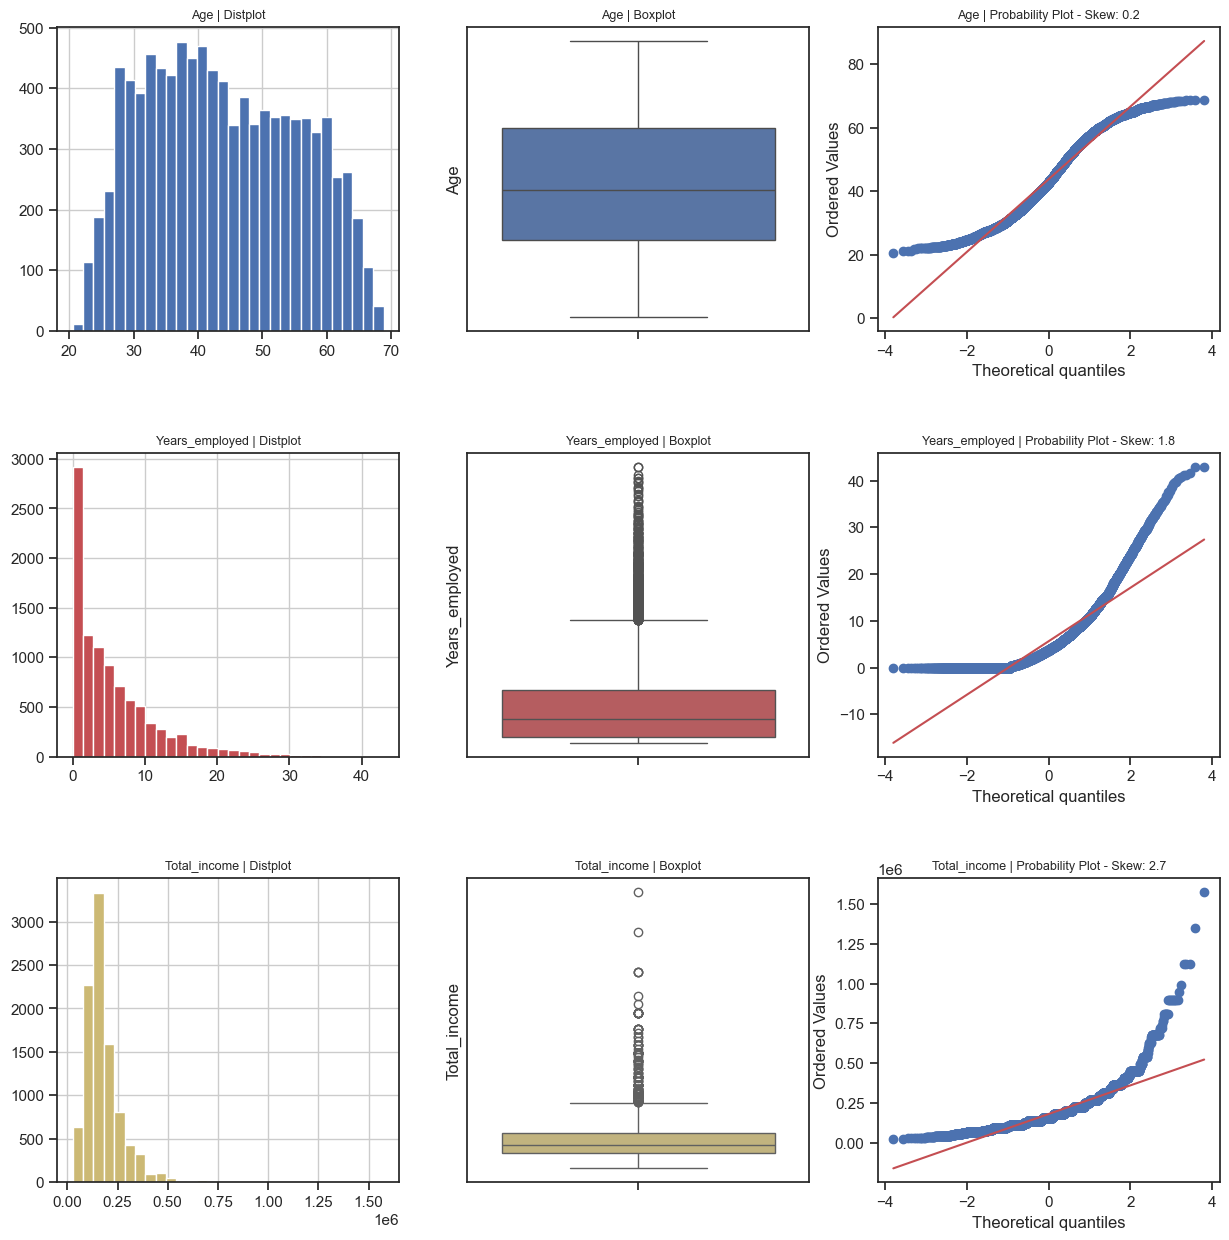

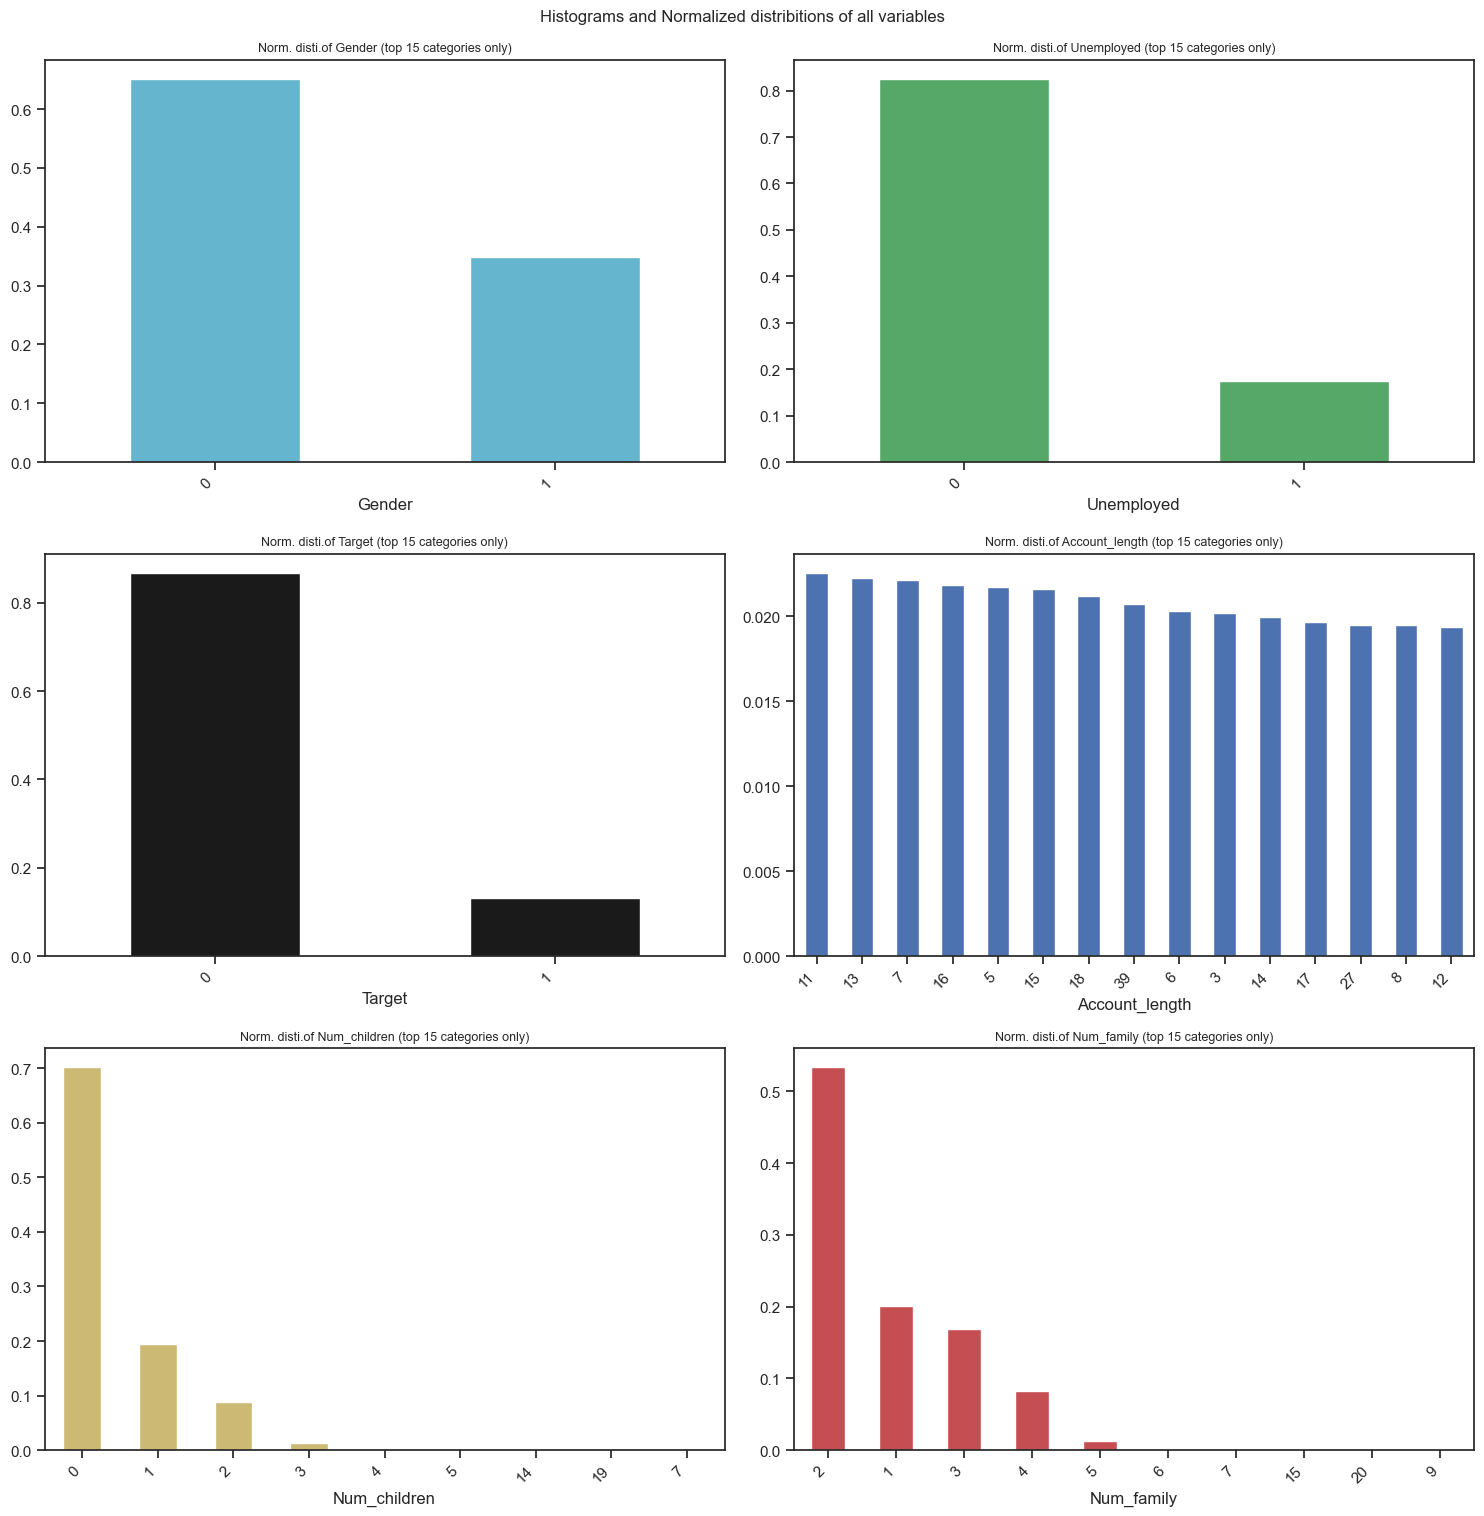

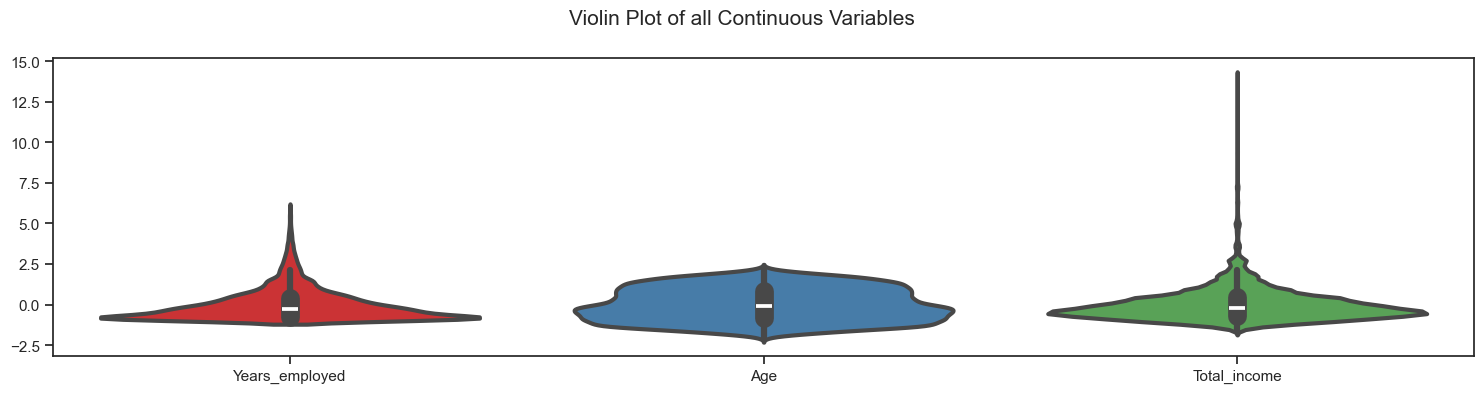

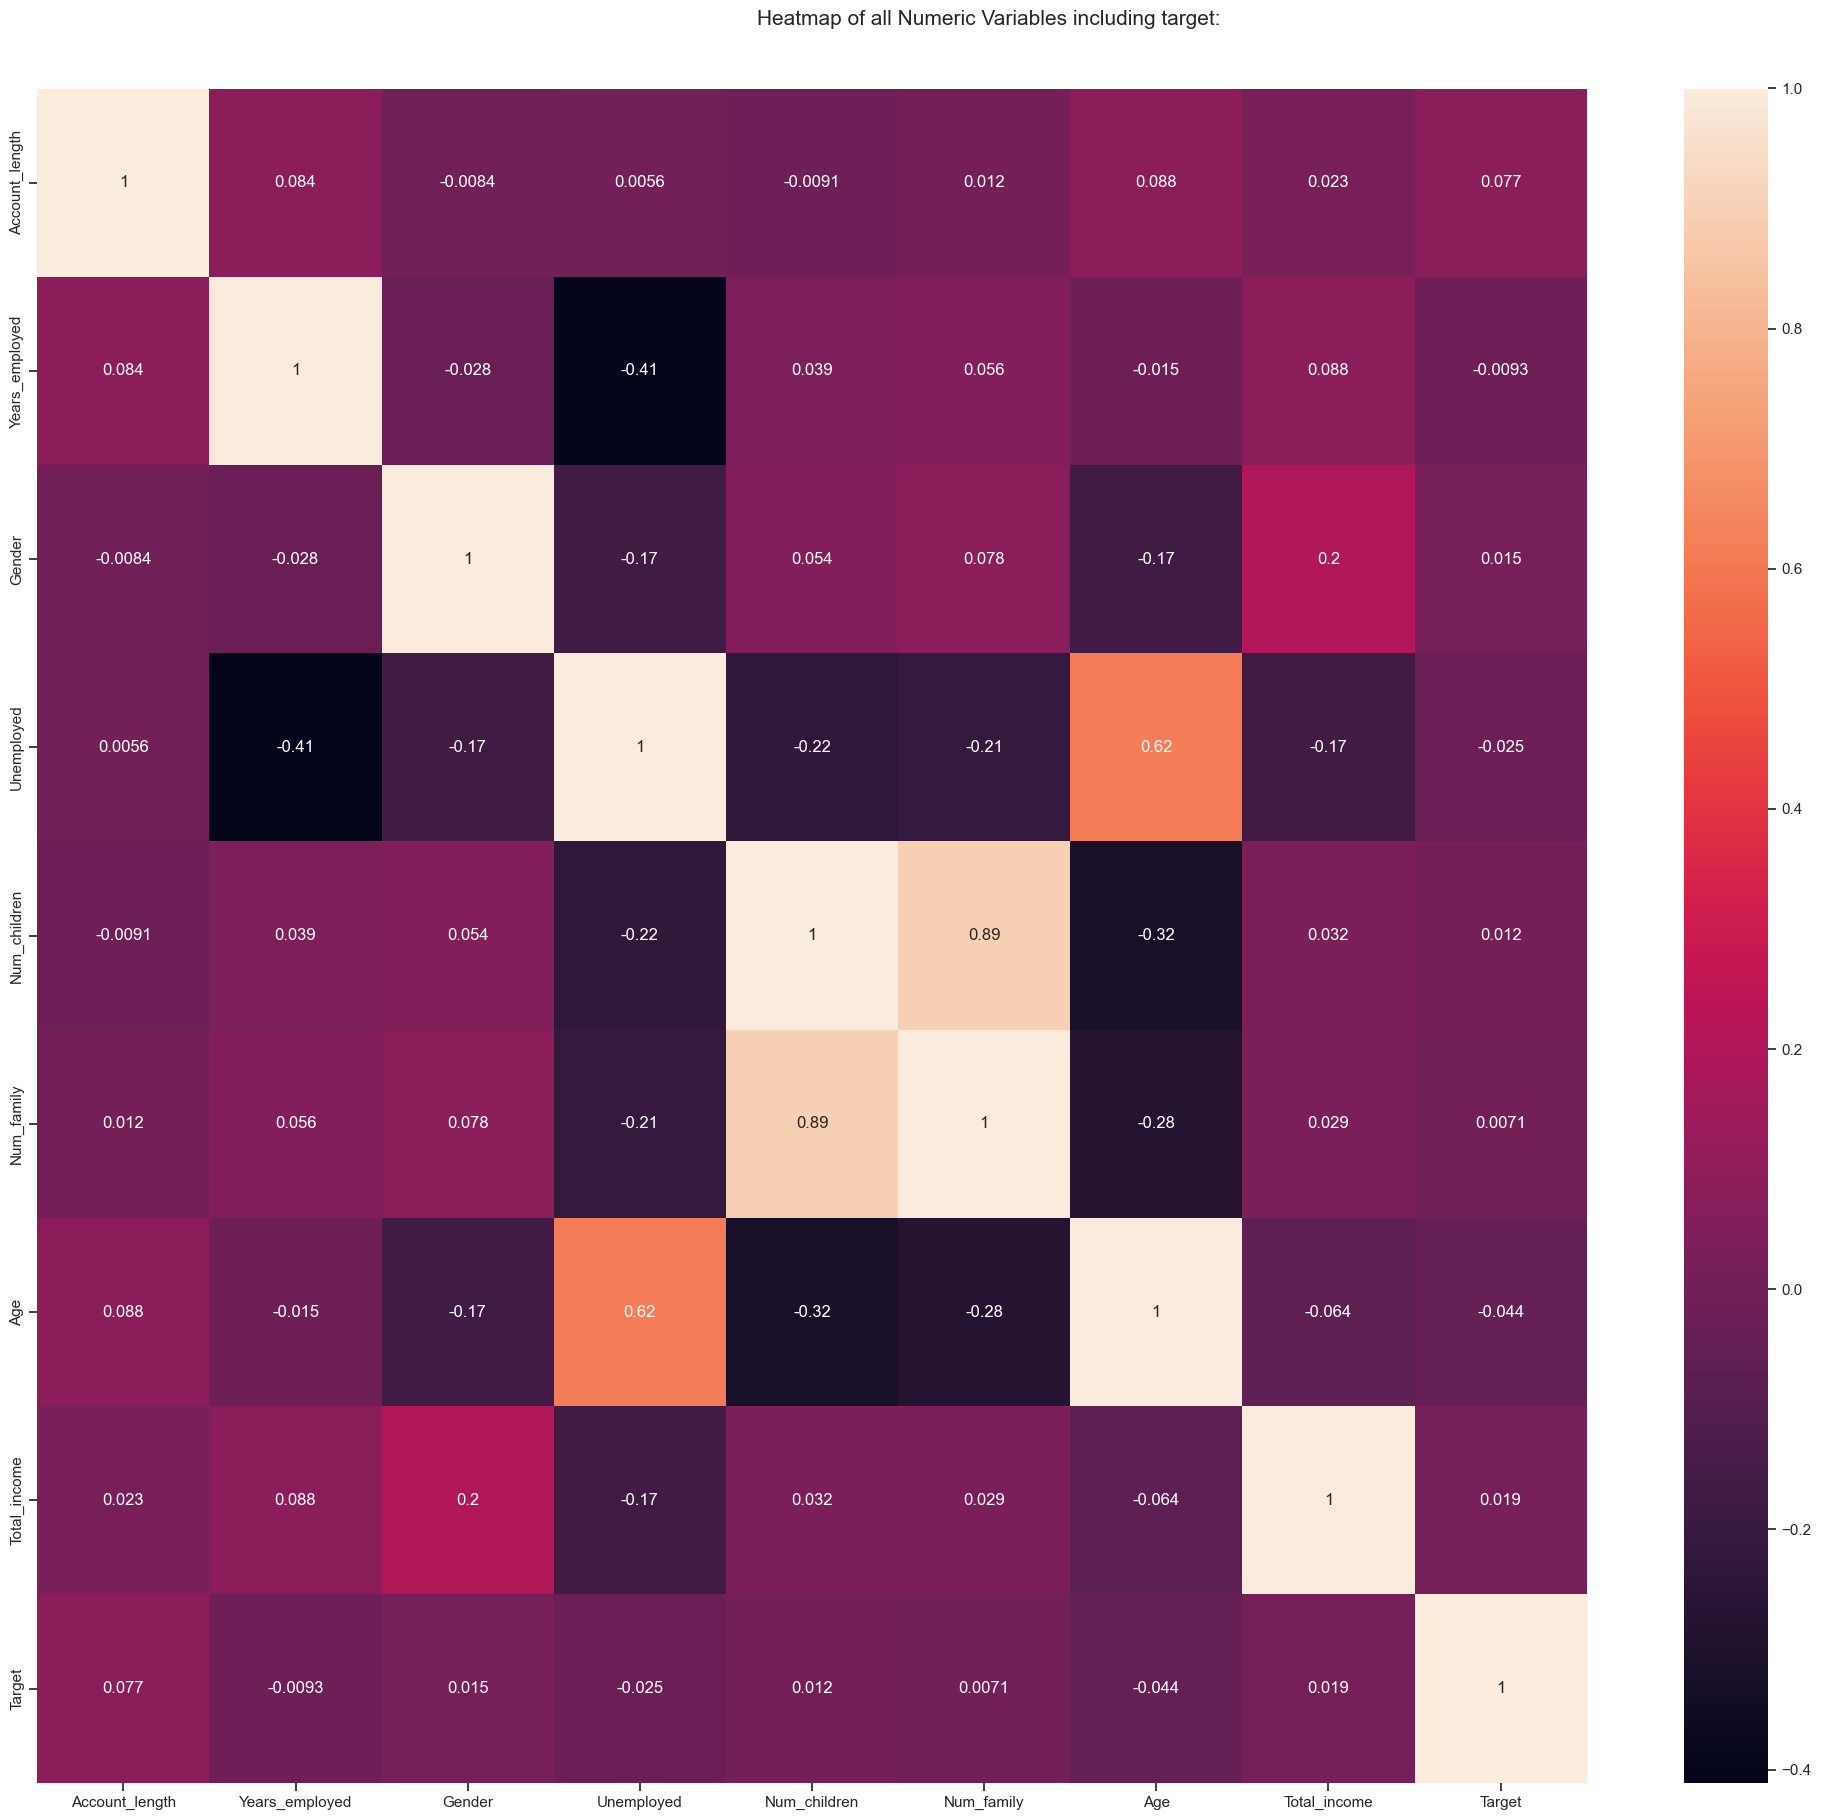

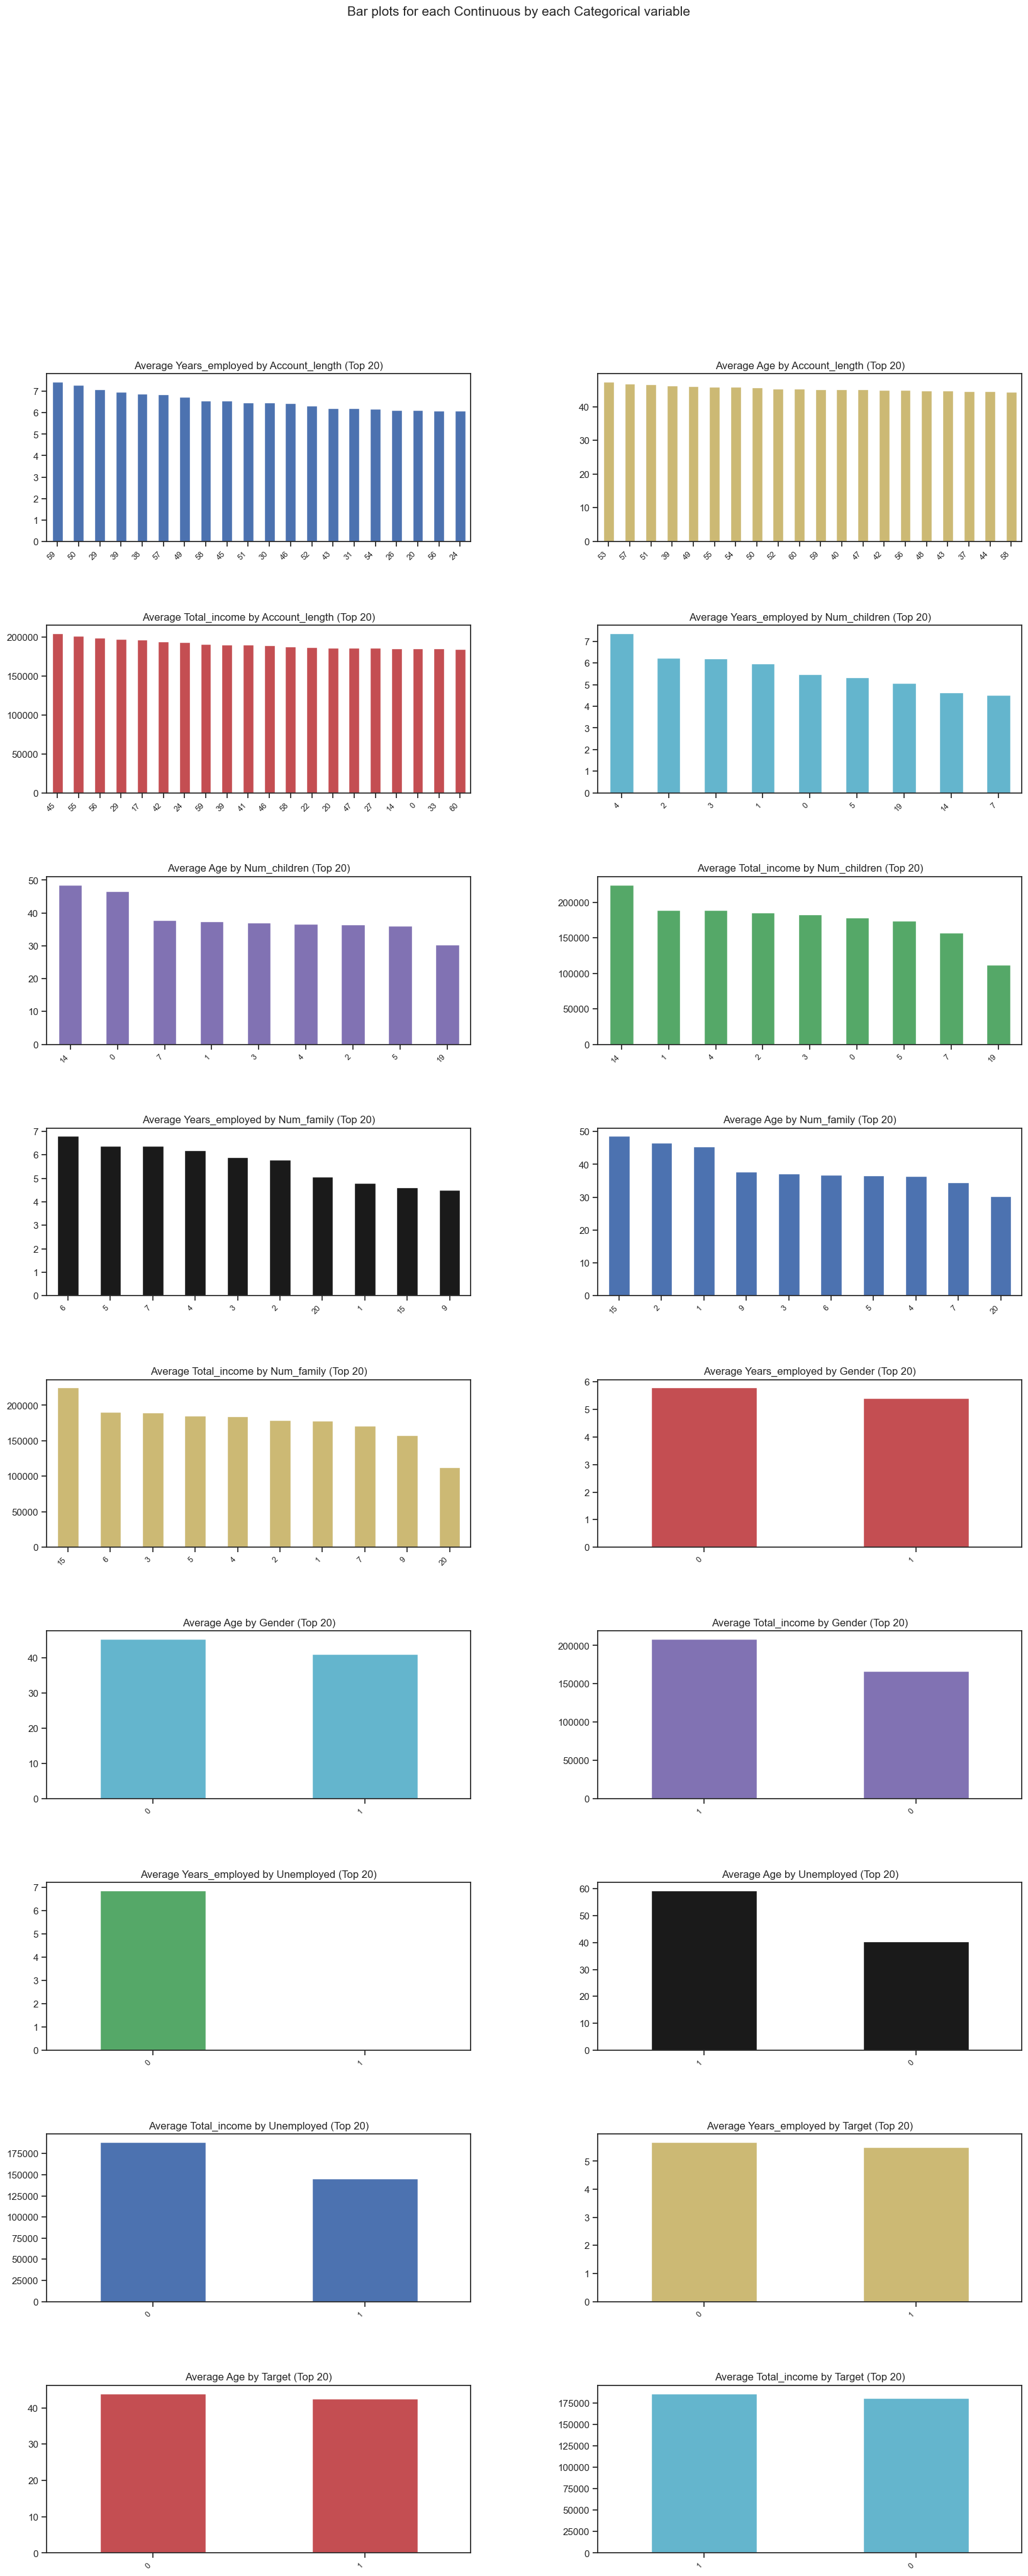

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Account_length,Years_employed,Gender,Unemployed,Num_children,Num_family,Age,Total_income,Target
0,15,12.435574,1,0,0,2,32.868574,427500.0,1
1,29,3.104787,1,0,0,2,58.793815,112500.0,0
2,4,8.353354,0,0,0,1,52.321403,270000.0,0
3,20,0.000000,0,1,0,1,61.504343,283500.0,0
4,5,2.105450,1,0,0,2,46.193967,270000.0,0
...,...,...,...,...,...,...,...,...,...
9704,20,0.542106,0,0,0,2,56.400884,180000.0,1
9705,19,7.375921,0,0,0,2,43.360233,112500.0,1
9706,21,4.711938,1,0,0,2,52.296762,90000.0,1
9707,32,3.627727,0,0,0,2,33.914454,157500.0,1


In [178]:
%matplotlib inline
#Autoviz for selected columns only
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

# Load your dataset
#data = pd.read_csv('/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv')
data = pd.read_csv('dataset.csv')

# Select columns of interest

columns_of_interest = ['Account_length', 'Years_employed','Gender', 'Unemployed', 'Num_children', 'Num_family', 'Age','Total_income', 'Target']  
#columns_of_interest = ['Account_length', 'Total_income', 'Num_children', 'Num_family','Target']
# Subset the data with selected columns
data_subset = data[columns_of_interest]

# Use AutoViz on the subset of data
AV = AutoViz_Class()
AV.AutoViz(data_subset)

In [179]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


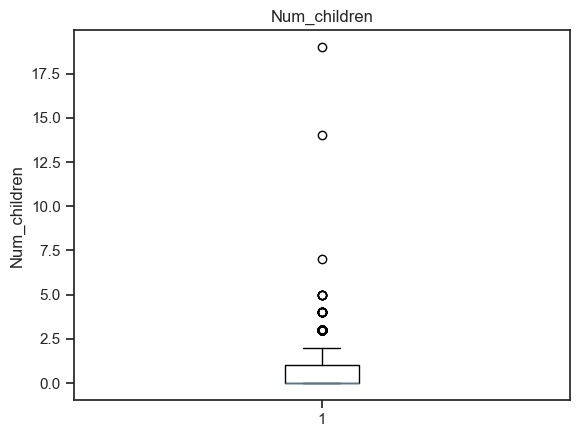

In [180]:
#Box plot to find any outliers
Num_children_outlier = df['Num_children']
fig1, ax1 = plt.subplots()
ax1.set_title('Num_children')
ax1.set_ylabel('Num_children')
ax1.boxplot(Num_children_outlier)
plt.show()

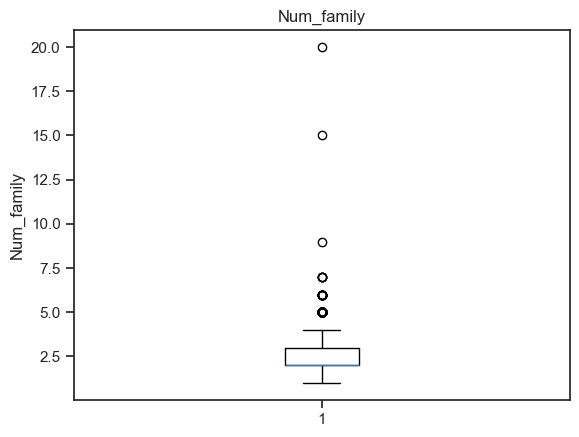

In [181]:
#Box plot to find any outliers
Num_family_outlier = df['Num_family']
fig1, ax1 = plt.subplots()
ax1.set_title('Num_family')
ax1.set_ylabel('Num_family')
ax1.boxplot(Num_family_outlier)
plt.show()

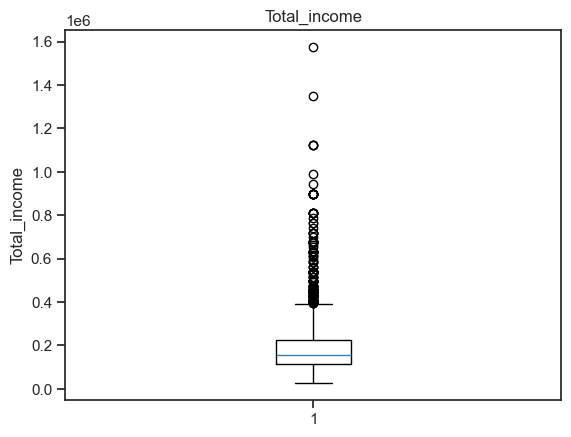

In [182]:
#Box plot to find any outliers
Total_income_outlier = df['Total_income']
fig1, ax1 = plt.subplots()
ax1.set_title('Total_income')
ax1.set_ylabel('Total_income')
ax1.boxplot(Total_income_outlier)
plt.show()

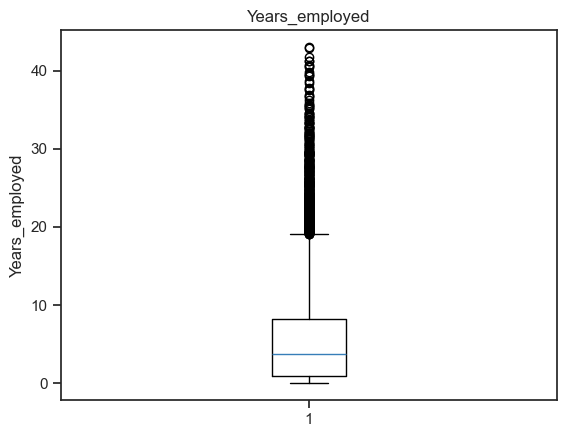

In [183]:
#Box plot to find any outliers
Years_employed_outlier = df['Years_employed']
fig1, ax1 = plt.subplots()
ax1.set_title('Years_employed')
ax1.set_ylabel('Years_employed')
ax1.boxplot(Years_employed_outlier)
plt.show()

In [184]:
#Find outliers
import pandas as pd
import numpy as np

# Function to count outliers based on the 99th percentile
def count_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outliers = {}
    for col in numeric_cols:
        upper_limit = df[col].quantile(0.99)
        outliers[col] = (df[col] > upper_limit).sum()
    return outliers

# Count outliers
outliers_count = count_outliers(data.drop(columns = 'ID'))

# Print the count of outliers for each numerical column
print("Outliers count based on the 99th percentile:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

Outliers count based on the 99th percentile:
Gender: 0
Own_car: 0
Own_property: 0
Work_phone: 0
Phone: 0
Email: 0
Unemployed: 0
Num_children: 26
Num_family: 25
Account_length: 0
Total_income: 78
Age: 98
Years_employed: 98
Target: 0


In [185]:
# Function to remove outliers based on the 99th percentile
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        upper_limit = df[col].quantile(0.99)
        df = df[df[col] <= upper_limit]
    return df

# Remove outliers
df = remove_outliers(data.drop(columns = 'ID'))

# Check the shape of the cleaned dataset
print("Original dataset shape:", data.drop(columns = 'ID').shape)
print("Cleaned dataset shape:", df.shape)

Original dataset shape: (9709, 19)
Cleaned dataset shape: (9412, 19)


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9412 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9412 non-null   int64  
 1   Own_car          9412 non-null   int64  
 2   Own_property     9412 non-null   int64  
 3   Work_phone       9412 non-null   int64  
 4   Phone            9412 non-null   int64  
 5   Email            9412 non-null   int64  
 6   Unemployed       9412 non-null   int64  
 7   Num_children     9412 non-null   int64  
 8   Num_family       9412 non-null   int64  
 9   Account_length   9412 non-null   int64  
 10  Total_income     9412 non-null   float64
 11  Age              9412 non-null   float64
 12  Years_employed   9412 non-null   float64
 13  Income_type      9412 non-null   object 
 14  Education_type   9412 non-null   object 
 15  Family_status    9412 non-null   object 
 16  Housing_type     9412 non-null   object 
 17  Occupation_type  94

In [187]:
columns_to_encode = ["Income_type",
                     "Education_type",
                     "Family_status",
                     "Housing_type",
                     "Occupation_type"
                   ]

In [188]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the label encoder
le = LabelEncoder()

# # Copy df data
# #df_data_label_encoded = df.copy()
# df = df.copy()

# Fit and transform the label encoder for each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9412 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9412 non-null   int64  
 1   Own_car          9412 non-null   int64  
 2   Own_property     9412 non-null   int64  
 3   Work_phone       9412 non-null   int64  
 4   Phone            9412 non-null   int64  
 5   Email            9412 non-null   int64  
 6   Unemployed       9412 non-null   int64  
 7   Num_children     9412 non-null   int64  
 8   Num_family       9412 non-null   int64  
 9   Account_length   9412 non-null   int64  
 10  Total_income     9412 non-null   float64
 11  Age              9412 non-null   float64
 12  Years_employed   9412 non-null   float64
 13  Income_type      9412 non-null   int32  
 14  Education_type   9412 non-null   int32  
 15  Family_status    9412 non-null   int32  
 16  Housing_type     9412 non-null   int32  
 17  Occupation_type  94

In [237]:
# balance or imbalance class?
df['Target'].value_counts()

Target
0    8170
1    1242
Name: count, dtype: int64

In [190]:
X = df.drop('Target', axis=1)
y = df['Target']

In [191]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
#imbalance class
y_train.value_counts()

Target
0    6521
1    1008
Name: count, dtype: int64

In [192]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
# SMOTE  the training data to balace the class (Synthetic Minority Oversampling Technique)
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [240]:
y_train_smote.value_counts()

Target
0    6521
1    6521
Name: count, dtype: int64

In [194]:
# Train the Random Forest classifier to find feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

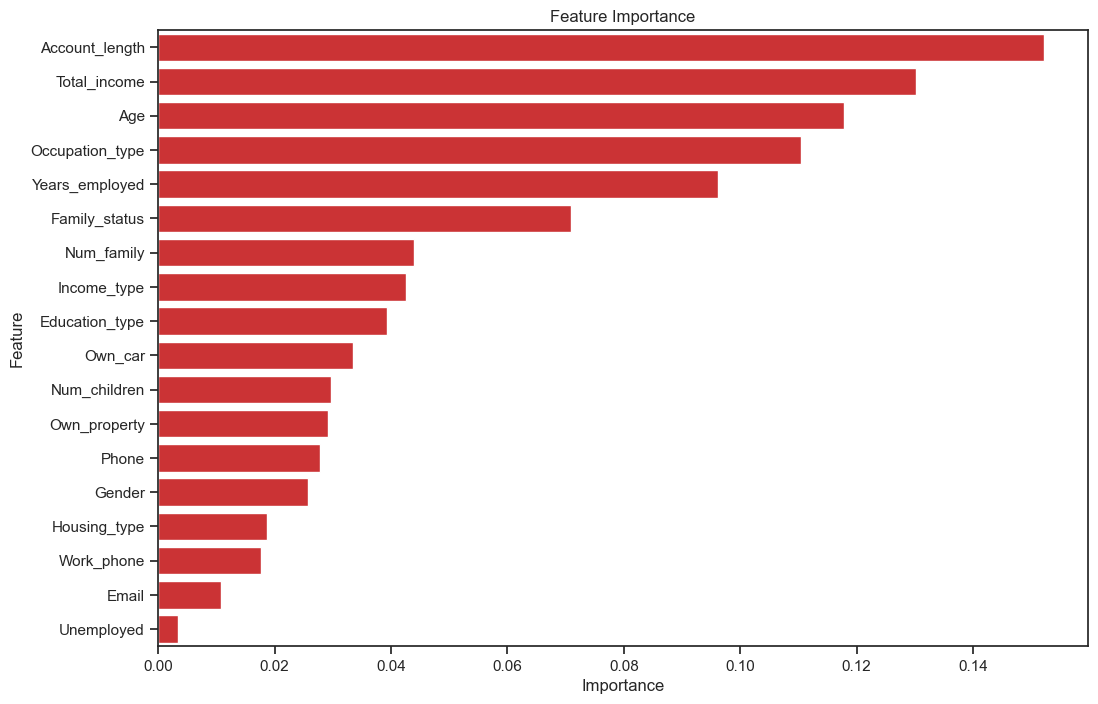

       Feature       Importance
9    Account_length   0.152151 
10     Total_income   0.130271 
11              Age   0.117826 
17  Occupation_type   0.110467 
12   Years_employed   0.096103 
15    Family_status   0.070909 
8        Num_family   0.043990 
13      Income_type   0.042602 
14   Education_type   0.039308 
1           Own_car   0.033507 


In [195]:
#Feature importance
feature_importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Step 9: Analyze the top features
top_features = importance_df.head(10)
print(top_features)

In [196]:
# Select top 10 important features
top_10_features_list = importance_df.head(10)['Feature'].tolist()

In [197]:
#Top 10 feature list
top_10_features_list

['Account_length',
 'Total_income',
 'Age',
 'Occupation_type',
 'Years_employed',
 'Family_status',
 'Num_family',
 'Income_type',
 'Education_type',
 'Own_car']

In [198]:
#Reduce the dataset to top 10 features
X_train_reduced_features = X_train[top_10_features_list]
X_test_reduced_features = X_test[top_10_features_list]

In [199]:
#check if features are reduced to 10 for X_train
X_train_reduced_features.shape


(7529, 10)

In [201]:
#check if features are reduced to 10 for X_test
X_test_reduced_features.shape

(1883, 10)

In [202]:
# Scale the features for reduced feature list
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced_features)
X_test_reduced_scaled = scaler.transform(X_test_reduced_features)

In [204]:
# Apply SMOTE to the reduced features
X_train_reduced_smote, y_train_reduced_smote = smote.fit_resample(X_train_reduced_scaled, y_train)

GridSearchCV - RandomForest Classifer

In [205]:
#takes almost 7 to 8  min.s to excute
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_reduced_smote, y_train_reduced_smote)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [206]:
# Train the Random Forest classifier with best parameters
best_params = grid_search.best_params_
rf_classifier_tuned = RandomForestClassifier(**best_params, random_state=42)
rf_classifier_tuned.fit(X_train_reduced_smote, y_train_reduced_smote)

RandomForestClassifier(max_depth=30, n_estimators=300, random_state=42)

In [207]:
#Make predictions using the tuned model
y_pred_tuned = rf_classifier_tuned.predict(X_test_reduced_scaled)

In [208]:
#Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy with Tuned Model: {accuracy_tuned:.2f}')
print('Classification Report with Tuned Model:')
print(classification_report(y_test, y_pred_tuned))
print('Confusion Matrix with Tuned Model:')
print(confusion_matrix(y_test, y_pred_tuned))

Accuracy with Tuned Model: 0.84
Classification Report with Tuned Model:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1649
           1       0.18      0.08      0.11       234

    accuracy                           0.84      1883
   macro avg       0.53      0.51      0.51      1883
weighted avg       0.79      0.84      0.81      1883

Confusion Matrix with Tuned Model:
[[1561   88]
 [ 215   19]]


## Model and Fit to a Logistic Regression Classifier

In [243]:
param_grid_lr = {
    'penalty' : ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['liblinear', 'saga']
}
#Create the logistic regression classifier model 
lr_model =LogisticRegression(max_iter=1000)
#RandomForestClassifier(random_state=42)

#perform GridSearach with Cross-validation
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train_reduced_smote, y_train_reduced_smote)

#Evaulation for accuracy
# accuracy_lr = grid_search_lr.score(X_test_reduced_scaled, y_test)
# print ("Accuracy", accuracy_lr)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [244]:
grid_search_lr_y_predict = grid_search_lr.predict(X_test_reduced_scaled)
print(classification_report(y_test, grid_search_lr_y_predict))

              precision    recall  f1-score   support

           0       0.90      0.57      0.70      1649
           1       0.15      0.54      0.24       234

    accuracy                           0.57      1883
   macro avg       0.52      0.56      0.47      1883
weighted avg       0.81      0.57      0.64      1883



KNN classifiers - GridSearch

In [211]:
# Create three KNN classifiers
from sklearn.neighbors import KNeighborsClassifier
untuned_model = KNeighborsClassifier()
grid_tuned_model = KNeighborsClassifier()
random_tuned_model = KNeighborsClassifier()

In [212]:
target = df["Target"]
target_names = ["negative", "positive"]

In [213]:
## Train a model without tuning
from sklearn.metrics import classification_report
untuned_model.fit(X_train, y_train)
untuned_y_pred = untuned_model.predict(X_test)
print(classification_report(y_test, untuned_y_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.88      0.98      0.93      1649
    positive       0.19      0.03      0.05       234

    accuracy                           0.87      1883
   macro avg       0.53      0.50      0.49      1883
weighted avg       0.79      0.87      0.82      1883



In [214]:
# Create the grid search estimator along with a parameter object containing the values to adjust.
# Try adjusting n_neighbors with values of 1 through 19. Adjust leaf_size by using 10, 50, 100, and 500.
# Include both uniform and distance options for weights.
from sklearn.model_selection import GridSearchCV
param_grid_KNN = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100, 500]
}
grid_clf = GridSearchCV(grid_tuned_model, param_grid_KNN, verbose=3)

In [215]:
# Fit the model by using the grid search estimator.
# This will take the KNN model and try each combination of parameters.
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.784 total time=   0.0s
[CV 3/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.766 total time=   0.0s
[CV 4/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 5/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.773 total time=   0.0s
[CV 1/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.768 total time=   0.0s
[CV 2/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.784 total time=   0.0s
[CV 3/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.766 total time=   0.0s
[CV 4/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.768 total time=   0.0s
[CV 5/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.773 total time=   0.0s
[CV 1/5] END leaf_size=

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 50, 100, 500],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [216]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

{'leaf_size': 10, 'n_neighbors': 17, 'weights': 'uniform'}


In [217]:
# Print the classification report for the best model
grid_y_pred = grid_clf.predict(X_test)
print(classification_report(y_test, grid_y_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.88      1.00      0.93      1649
    positive       0.00      0.00      0.00       234

    accuracy                           0.88      1883
   macro avg       0.44      0.50      0.47      1883
weighted avg       0.77      0.88      0.82      1883



KNN - RandomizedSearchCV

In [218]:
# Create the parameter object for the randomized search estimator.
# Try adjusting n_neighbors with values of 1 through 19. 
# Adjust leaf_size by using a range from 1 to 500.
# Include both uniform and distance options for weights.
param_grid_random = {
    'n_neighbors': np.arange(1,20,2),
    'weights': ['uniform', 'distance'],
    'leaf_size': np.arange(1, 500)
}
param_grid_random

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
 'weights': ['uniform', 'distance'],
 'leaf_size': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        1

In [219]:
# Create the randomized search estimator
from sklearn.model_selection import RandomizedSearchCV
random_clf = RandomizedSearchCV(random_tuned_model, param_grid_random, random_state=0, verbose=3)

In [220]:
# Fit the model by using the randomized search estimator.
random_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END leaf_size=137, n_neighbors=13, weights=uniform;, score=0.865 total time=   0.0s
[CV 2/5] END leaf_size=137, n_neighbors=13, weights=uniform;, score=0.865 total time=   0.0s
[CV 3/5] END leaf_size=137, n_neighbors=13, weights=uniform;, score=0.863 total time=   0.0s
[CV 4/5] END leaf_size=137, n_neighbors=13, weights=uniform;, score=0.865 total time=   0.0s
[CV 5/5] END leaf_size=137, n_neighbors=13, weights=uniform;, score=0.866 total time=   0.0s
[CV 1/5] END leaf_size=493, n_neighbors=5, weights=distance;, score=0.851 total time=   0.0s
[CV 2/5] END leaf_size=493, n_neighbors=5, weights=distance;, score=0.855 total time=   0.0s
[CV 3/5] END leaf_size=493, n_neighbors=5, weights=distance;, score=0.841 total time=   0.0s
[CV 4/5] END leaf_size=493, n_neighbors=5, weights=distance;, score=0.836 total time=   0.0s
[CV 5/5] END leaf_size=493, n_neighbors=5, weights=distance;, score=0.854 total time=   0.0s
[CV 1/5] 

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,...
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499]),
                                        'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'weights': ['uniform', 'distance']},
                   random_state=0, verbose=3)

In [221]:
# List the best parameters for this dataset
print(random_clf.best_params_)

{'weights': 'uniform', 'n_neighbors': 15, 'leaf_size': 294}


In [222]:
# Make predictions with the hypertuned model
random_tuned_pred = random_clf.predict(X_test)

In [223]:
# Calculate the classification report
print(classification_report(y_test, random_tuned_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.88      1.00      0.93      1649
    positive       0.00      0.00      0.00       234

    accuracy                           0.88      1883
   macro avg       0.44      0.50      0.47      1883
weighted avg       0.77      0.88      0.82      1883



GradientBooster Classifer GridSearchCV

In [224]:
# Takes 9 to 10 min.s for execution
# Define the parameter grid for Gradient Boosting Classifier
from sklearn.metrics import accuracy_score
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}

# Perform GridSearchCV with the parameter grid for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Get best parameters and score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Best Parameters for Gradient Boosting:", best_params_gb)
print("Best Score for Gradient Boosting:", best_score_gb)

# Make predictions using the best Gradient Boosting model
best_model_gb = grid_search_gb.best_estimator_
y_pred_train_gb = best_model_gb.predict(X_train)
y_pred_test_gb = best_model_gb.predict(X_test)

# Evaluate the best Gradient Boosting model
train_accuracy_gb = accuracy_score(y_train, y_pred_train_gb)
test_accuracy_gb = accuracy_score(y_test, y_pred_test_gb)
print("Gradient Boosting Model Metrics:")
print("Train Accuracy:", train_accuracy_gb)
print("Test Accuracy:", test_accuracy_gb)
# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_test_gb)
print("Confusion Matrix:\n", conf_matrix_gb)

Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 100}
Best Score for Gradient Boosting: 0.8663833260534826
Gradient Boosting Model Metrics:
Train Accuracy: 0.8665161376012751
Test Accuracy: 0.8762612851832182
Confusion Matrix:
 [[1649    0]
 [ 233    1]]


In [225]:
print(classification_report(y_test, y_pred_test_gb,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.88      1.00      0.93      1649
    positive       1.00      0.00      0.01       234

    accuracy                           0.88      1883
   macro avg       0.94      0.50      0.47      1883
weighted avg       0.89      0.88      0.82      1883



## Model and Fit to a Support Vector Machine

In [226]:
# Create the support vector machine classifier model with a 'rbf' kernel
svm_model = SVC(kernel='poly')

# Fit the model to the training data
#svm_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_reduced_smote, y_train_reduced_smote)

SVC(kernel='poly')

In [227]:
# Validate the model by checking the model accuracy with model.score
# print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

print(f"Training Data Score: {svm_model.score(X_train_reduced_smote, y_train_reduced_smote)}")
print(f"Testing Data Score: {svm_model.score(X_test_reduced_scaled, y_test)}")


Training Data Score: 0.6222971936819506
Testing Data Score: 0.574614976101965


In [228]:
# Make predictions on the test data
predictions_svm = svm_model.predict(X_test_reduced_scaled)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_svm, labels = [1,0]))

[[122 112]
 [689 960]]


In [229]:
# Create a classification report
print("Support Vector Machine Classiciation Report")
print(classification_report(y_test, predictions_svm, labels = [1, 0]))

Support Vector Machine Classiciation Report
              precision    recall  f1-score   support

           1       0.15      0.52      0.23       234
           0       0.90      0.58      0.71      1649

    accuracy                           0.57      1883
   macro avg       0.52      0.55      0.47      1883
weighted avg       0.80      0.57      0.65      1883



## Model and Fit to a Decision Tree Classifier

In [230]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier(max_depth=6)

# Fit the model to the training data
dt_model.fit(X_train_reduced_smote, y_train_reduced_smote)

DecisionTreeClassifier(max_depth=6)

In [231]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_reduced_smote, y_train_reduced_smote)}")
print(f"Testing Data Score: {dt_model.score(X_test_reduced_scaled, y_test)}")

Training Data Score: 0.6377089403465727
Testing Data Score: 0.5018587360594795


In [232]:
# Make predictions on the test data
predictions_dt = dt_model.predict(X_test_reduced_scaled)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_dt, labels = [1,0]))

[[134 100]
 [838 811]]


In [233]:
# Create a classification report
print("Decision Tree Classiciation Report")
print(classification_report(y_test, predictions_dt, labels = [1, 0]))

Decision Tree Classiciation Report
              precision    recall  f1-score   support

           1       0.14      0.57      0.22       234
           0       0.89      0.49      0.63      1649

    accuracy                           0.50      1883
   macro avg       0.51      0.53      0.43      1883
weighted avg       0.80      0.50      0.58      1883



## Model and Fit to a Gradient Boosting Classifier

In [234]:
# Train the Gradient Boosting classifier
gfc = GradientBoostingClassifier(random_state=1).fit(X_train_reduced_smote, y_train_reduced_smote)

# Evaluate the model
print(f'Training Score: {gfc.score(X_train_reduced_smote, y_train_reduced_smote)}')
print(f'Testing Score: {gfc.score(X_test_reduced_scaled, y_test)}')

Training Score: 0.8504063793896641
Testing Score: 0.8003186404673394


In [235]:
# Make predictions on the test data
predictions_gfc = gfc.predict(X_test_reduced_scaled)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_gfc, labels = [1,0]))

[[  24  210]
 [ 166 1483]]


In [236]:
# Create a classification report
print("Gradient Boosting Classiciation Report")
print(classification_report(y_test, predictions_gfc, labels = [1, 0]))

Gradient Boosting Classiciation Report
              precision    recall  f1-score   support

           1       0.13      0.10      0.11       234
           0       0.88      0.90      0.89      1649

    accuracy                           0.80      1883
   macro avg       0.50      0.50      0.50      1883
weighted avg       0.78      0.80      0.79      1883

